In [30]:
#%pip install numpy==1.19.5
#%pip install scipy==1.10.1
#%pip install scikit-learn
#%pip install pandas==1.4.4
#%pip install contourpy==1.1.1
#%pip install matplotlib==3.6s

In [31]:
#%pip install keras==2.15.0

In [32]:
#%pip install tensorflow==2.15.0

In [33]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [34]:
import numpy as np
import sklearn
import pandas as pd

In [1]:
import keras
import tensorflow as tf

print(tf.__version__)
print(keras.__version__)

C:\Users\avitr\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2.9.1
2.9.0


In [36]:
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [37]:
print(np.__version__)

1.26.4


In [38]:
import pandas as pd

In [39]:
from keras.datasets import cifar10
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [40]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [41]:
import matplotlib.pyplot as plt

In [42]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


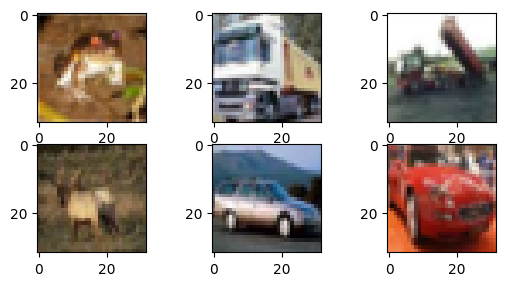

In [43]:

(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(6):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i])
# show the figure
plt.show()

In [44]:

# from tensorflow.keras import Sequential
# from keras.layers import Dense, Activation
# #from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.optimizers import SGD
# tf.keras.optimizers.legacy.SGD
# # from keras.optimizers import gradient_descent_v2
# # from tensorflow.keras.optimizers import SGD
# from keras import layers

# #from keras.optimizers import SGD

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import SGD

In [46]:
def define_model():
    model = Sequential()
    return model

In [47]:

model = Sequential()
model.add(Dense(250, activation='relu', input_dim=3072))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 36s - loss: 1.8269 - accuracy: 0.3406 - val_loss: 1.7281 - val_accuracy: 0.3839 - 36s/epoch - 29ms/step
Epoch 2/15
1250/1250 - 17s - loss: 1.6691 - accuracy: 0.4034 - val_loss: 1.7121 - val_accuracy: 0.3802 - 17s/epoch - 14ms/step
Epoch 3/15
1250/1250 - 15s - loss: 1.5983 - accuracy: 0.4294 - val_loss: 1.6075 - val_accuracy: 0.4247 - 15s/epoch - 12ms/step
Epoch 4/15
1250/1250 - 13s - loss: 1.5503 - accuracy: 0.4454 - val_loss: 1.5670 - val_accuracy: 0.4423 - 13s/epoch - 10ms/step
Epoch 5/15
1250/1250 - 13s - loss: 1.5158 - accuracy: 0.4607 - val_loss: 1.5608 - val_accuracy: 0.4486 - 13s/epoch - 10ms/step
Epoch 6/15
1250/1250 - 11s - loss: 1.4943 - accuracy: 0.4656 - val_loss: 1.5508 - val_accuracy: 0.4448 - 11s/epoch - 9ms/step
Epoch 7/15
1250/1250 - 12s - loss: 1.4678 - accuracy: 0.4730 - val_loss: 1.5094 - val_accuracy: 0.4696 - 12s/epoch - 9ms/step
Epoch 8/15
1250/1250 - 11s - loss: 1.4510 - accuracy: 0.4804 - val_loss: 1.5304 - val_accuracy: 0.4619 - 11s/epoc

In [49]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

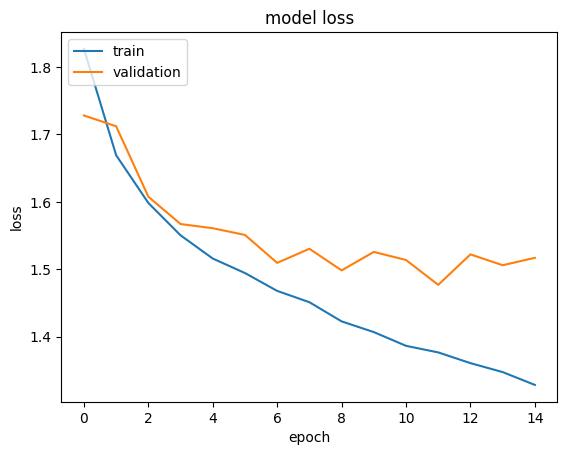

In [50]:
plotLosses(history)

In [51]:
score = model.evaluate(X_test, y_test, batch_size=100, verbose=0)

In [52]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.5076106786727905, 0.4724000096321106]


In [53]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [54]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [55]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [58]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 113s - loss: 0.8880 - accuracy: 0.6871 - val_loss: 1.0371 - val_accuracy: 0.6418 - 113s/epoch - 91ms/step
Epoch 2/15
1250/1250 - 98s - loss: 0.6831 - accuracy: 0.7612 - val_loss: 1.0525 - val_accuracy: 0.6477 - 98s/epoch - 78ms/step
Epoch 3/15
1250/1250 - 96s - loss: 0.4808 - accuracy: 0.8334 - val_loss: 1.1851 - val_accuracy: 0.6657 - 96s/epoch - 77ms/step
Epoch 4/15
1250/1250 - 102s - loss: 0.3246 - accuracy: 0.8885 - val_loss: 1.3313 - val_accuracy: 0.6538 - 102s/epoch - 82ms/step
Epoch 5/15
1250/1250 - 99s - loss: 0.2322 - accuracy: 0.9194 - val_loss: 1.5603 - val_accuracy: 0.6464 - 99s/epoch - 80ms/step
Epoch 6/15
1250/1250 - 100s - loss: 0.1688 - accuracy: 0.9431 - val_loss: 1.7124 - val_accuracy: 0.6449 - 100s/epoch - 80ms/step
Epoch 7/15
1250/1250 - 107s - loss: 0.1430 - accuracy: 0.9518 - val_loss: 1.8808 - val_accuracy: 0.6389 - 107s/epoch - 86ms/step
Epoch 8/15
1250/1250 - 100s - loss: 0.1288 - accuracy: 0.9560 - val_loss: 2.0987 - val_accuracy: 0.6419

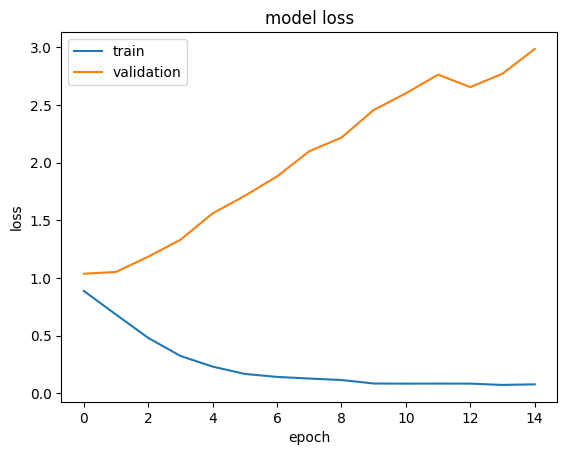

In [59]:
plotLosses(history)

In [61]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print(model.metrics_names)
print(score)

['loss', 'accuracy']
[2.8620834350585938, 0.6308000087738037]


In [63]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(250, activation='relu'))
# Dropout layer added here
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [64]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 128s - loss: 1.7019 - accuracy: 0.3774 - val_loss: 1.3442 - val_accuracy: 0.5135 - 128s/epoch - 102ms/step
Epoch 2/15
1250/1250 - 113s - loss: 1.3769 - accuracy: 0.5029 - val_loss: 1.2125 - val_accuracy: 0.5694 - 113s/epoch - 91ms/step
Epoch 3/15
1250/1250 - 120s - loss: 1.2273 - accuracy: 0.5616 - val_loss: 1.1205 - val_accuracy: 0.6034 - 120s/epoch - 96ms/step
Epoch 4/15
1250/1250 - 119s - loss: 1.1139 - accuracy: 0.6065 - val_loss: 1.0573 - val_accuracy: 0.6317 - 119s/epoch - 95ms/step
Epoch 5/15
1250/1250 - 112s - loss: 1.0199 - accuracy: 0.6372 - val_loss: 1.0091 - val_accuracy: 0.6459 - 112s/epoch - 90ms/step
Epoch 6/15
1250/1250 - 134s - loss: 0.9489 - accuracy: 0.6630 - val_loss: 0.9885 - val_accuracy: 0.6600 - 134s/epoch - 107ms/step
Epoch 7/15
1250/1250 - 127s - loss: 0.8785 - accuracy: 0.6899 - val_loss: 0.9508 - val_accuracy: 0.6726 - 127s/epoch - 102ms/step
Epoch 8/15
1250/1250 - 116s - loss: 0.8260 - accuracy: 0.7052 - val_loss: 0.9678 - val_accurac

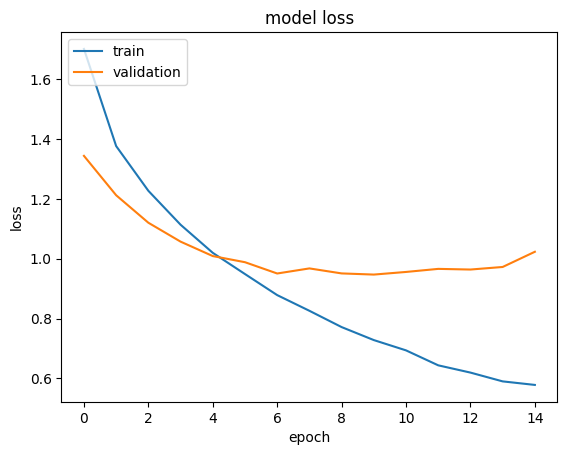

In [65]:
plotLosses(history)

In [66]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.0460608005523682, 0.6733999848365784]


In [71]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation

In [72]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(250))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [73]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 156s - loss: 1.5900 - accuracy: 0.4343 - val_loss: 1.3568 - val_accuracy: 0.5318 - 156s/epoch - 125ms/step
Epoch 2/15
1250/1250 - 141s - loss: 1.2343 - accuracy: 0.5571 - val_loss: 1.1366 - val_accuracy: 0.5959 - 141s/epoch - 113ms/step
Epoch 3/15
1250/1250 - 134s - loss: 1.0837 - accuracy: 0.6155 - val_loss: 1.0355 - val_accuracy: 0.6311 - 134s/epoch - 107ms/step
Epoch 4/15
1250/1250 - 149s - loss: 0.9866 - accuracy: 0.6508 - val_loss: 1.0613 - val_accuracy: 0.6338 - 149s/epoch - 119ms/step
Epoch 5/15
1250/1250 - 170s - loss: 0.9186 - accuracy: 0.6737 - val_loss: 0.8834 - val_accuracy: 0.6905 - 170s/epoch - 136ms/step
Epoch 6/15
1250/1250 - 142s - loss: 0.8604 - accuracy: 0.6963 - val_loss: 0.9114 - val_accuracy: 0.6783 - 142s/epoch - 114ms/step
Epoch 7/15
1250/1250 - 169s - loss: 0.8052 - accuracy: 0.7135 - val_loss: 0.8660 - val_accuracy: 0.6998 - 169s/epoch - 135ms/step
Epoch 8/15
1250/1250 - 175s - loss: 0.7599 - accuracy: 0.7296 - val_loss: 0.9588 - val_acc

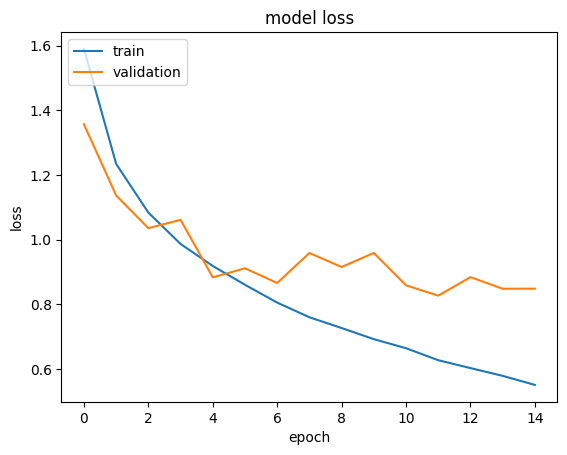

In [74]:
plotLosses(history)

In [75]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.0460608005523682, 0.6733999848365784]


In [83]:
from keras.preprocessing.image import ImageDataGenerator

In [91]:
train_datagen = ImageDataGenerator(
        brightness_range=(0.5, 1.5),
        zoom_range=0.2,

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:20000], y_train[:20000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[20000:], y_train[20000:], batch_size=32)

In [92]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(250))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [93]:
history = model.fit(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[20000:]) / 32,
                    steps_per_epoch=len(X_train[:20000]) / 32,
                    epochs=15,
                    verbose=2)

Epoch 1/15
625/625 - 94s - loss: 2.5234 - accuracy: 0.1070 - val_loss: 28.0444 - val_accuracy: 0.1003 - 94s/epoch - 150ms/step
Epoch 2/15
625/625 - 88s - loss: 2.4448 - accuracy: 0.1023 - val_loss: 18.9221 - val_accuracy: 0.1042 - 88s/epoch - 141ms/step
Epoch 3/15
625/625 - 89s - loss: 2.3978 - accuracy: 0.1060 - val_loss: 12.5626 - val_accuracy: 0.1020 - 89s/epoch - 142ms/step
Epoch 4/15
625/625 - 86s - loss: 2.3611 - accuracy: 0.1054 - val_loss: 12.3696 - val_accuracy: 0.1256 - 86s/epoch - 138ms/step
Epoch 5/15
625/625 - 87s - loss: 2.3409 - accuracy: 0.1057 - val_loss: 6.7668 - val_accuracy: 0.1045 - 87s/epoch - 139ms/step
Epoch 6/15
625/625 - 91s - loss: 2.3306 - accuracy: 0.1089 - val_loss: 11.5654 - val_accuracy: 0.0966 - 91s/epoch - 145ms/step
Epoch 7/15
625/625 - 89s - loss: 2.3263 - accuracy: 0.1069 - val_loss: 5.9332 - val_accuracy: 0.1156 - 89s/epoch - 143ms/step
Epoch 8/15
625/625 - 87s - loss: 2.3203 - accuracy: 0.1071 - val_loss: 7.8340 - val_accuracy: 0.1004 - 87s/epoch 

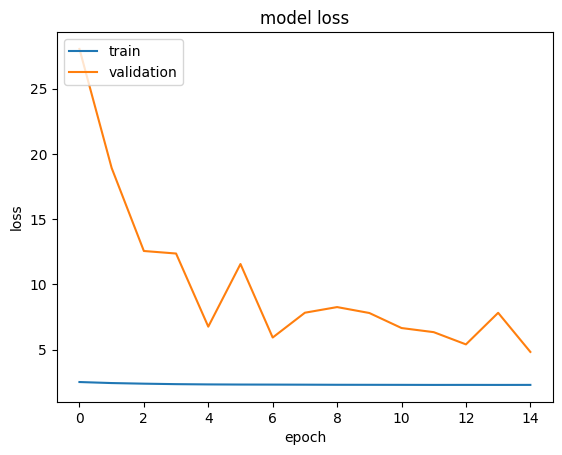

In [94]:
plotLosses(history)

In [96]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[4.83836030960083, 0.10350000113248825]


In [76]:

train_datagen = ImageDataGenerator(
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:20000], y_train[:20000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[20000:], y_train[20000:], batch_size=32)

In [77]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(250))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)


In [79]:
history = model.fit(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[20000:]) / 32,
                    steps_per_epoch=len(X_train[:20000]) / 32,
                    epochs=15,
                    verbose=2)

Epoch 1/15
625/625 - 154s - loss: 1.7504 - accuracy: 0.3609 - val_loss: 1.5963 - val_accuracy: 0.4320 - 154s/epoch - 246ms/step
Epoch 2/15
625/625 - 98s - loss: 1.6656 - accuracy: 0.3943 - val_loss: 1.7084 - val_accuracy: 0.3856 - 98s/epoch - 157ms/step
Epoch 3/15
625/625 - 114s - loss: 1.5850 - accuracy: 0.4210 - val_loss: 1.4461 - val_accuracy: 0.4633 - 114s/epoch - 182ms/step
Epoch 4/15
625/625 - 99s - loss: 1.5414 - accuracy: 0.4425 - val_loss: 1.3043 - val_accuracy: 0.5198 - 99s/epoch - 159ms/step
Epoch 5/15
625/625 - 92s - loss: 1.5105 - accuracy: 0.4491 - val_loss: 1.2611 - val_accuracy: 0.5402 - 92s/epoch - 147ms/step
Epoch 6/15
625/625 - 86s - loss: 1.4602 - accuracy: 0.4731 - val_loss: 1.2345 - val_accuracy: 0.5464 - 86s/epoch - 138ms/step
Epoch 7/15
625/625 - 95s - loss: 1.4294 - accuracy: 0.4837 - val_loss: 1.2988 - val_accuracy: 0.5325 - 95s/epoch - 153ms/step
Epoch 8/15
625/625 - 87s - loss: 1.4005 - accuracy: 0.4942 - val_loss: 1.3071 - val_accuracy: 0.5389 - 87s/epoch -

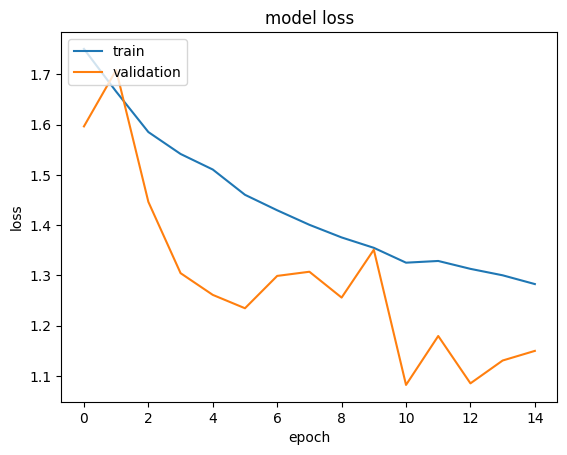

In [80]:
plotLosses(history)

In [82]:
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.1499735116958618, 0.5932000279426575]


# inception

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
print(tf.__version__)

from keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import InceptionV3
from keras.datasets import cifar10
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Activation,Dropout,GlobalAveragePooling2D,MaxPooling2D,RandomFlip,RandomZoom,RandomRotation

In [ ]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)

print((x_train.shape, y_train.shape))
print((x_val.shape, y_val.shape))

In [ ]:
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=y_train.shape[1])

In [ ]:
data_augmentation = Sequential(
    [RandomFlip("horizontal"), 
     RandomRotation(0.1),
     RandomZoom(0.1)]
)

In [ ]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224)))(inputs)
x = data_augmentation(x)
x = tf.keras.applications.inception_v3.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(10, activation=('softmax'))(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

In [ ]:
def plot_history(history):
    history_frame = pd.DataFrame(history.history)
    history_frame.loc[:, ['loss', 'val_loss']].plot()
    history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
    return

In [ ]:
# unfreeze the layers of the pre-trained model
base_model.trainable = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

In [ ]:
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', 
                                   min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3) 
callbacks_list = [early, reduceLROnPlat]

In [ ]:
epochs = 3 #10
history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, verbose=1,callbacks = callbacks_list)

In [ ]:
plot_history(history)

In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

predictions=model.predict(x_val)

y_pred_classes = np.argmax(predictions, axis=1)
y_true = np.argmax(y_val, axis=1)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print(classification_report(y_true, y_pred_classes))

In [ ]:
print(accuracy_score(y_true, y_pred_classes))